# 농식품 구매정보 데이터 시각화

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # 경고 메시지 무시

In [2]:
## 한글 폰트 설정
import os
os.name

import os
if os.name == 'posix' :
    plt.rc('font', family='AppleGothic')    # 맥
else:
    plt.rc('font', family='Malgun Gothic')  # 윈도우

# 마이너스 폰트 깨지는 문제애 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 더 선명해짐
%config InlineBackend.figure_font = 'retina'

In [3]:
## 데이터 불러오기
import chardet

# 파일의 인코딩 감지
with open("fruits1023.csv", 'rb') as file:
    
    raw_data = file.read(10000)  # 파일의 처음 10,000 바이트 읽기
    result = chardet.detect(raw_data)

    encoding = result['encoding']
    print(f"파일 인코딩: {encoding}")


# 감지된 인코딩으로 파일 읽기
df = pd.read_csv("fruits1023.csv", encoding=encoding, encoding_errors='ignore')

print(df.shape)
df.head(3)

파일 인코딩: EUC-KR
(538382, 49)


,year,month,panel_code,panel_code_new,type_method,type_method_etc,type_channel_new,type_channel,type_channel_etc,shop_day,...,retail_new,shop_time,take_out,transport_pre,transport_post,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,기업형슈퍼마켓,NaN,2010-01-19,...,기업형슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만
1,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,슈퍼마켓,NaN,2010-01-18,...,슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만
2,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,슈퍼마켓,NaN,2010-01-27,...,슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만


# 1. 데이터 확인

In [4]:
# 변수 기본 정보 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538382 entries, 0 to 538381
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              538382 non-null  int64  
 1   month             538382 non-null  int64  
 2   panel_code        538382 non-null  object 
 3   panel_code_new    491529 non-null  object 
 4   type_method       47699 non-null   object 
 5   type_method_etc   18 non-null      object 
 6   type_channel_new  538382 non-null  object 
 7   type_channel      530370 non-null  object 
 8   type_channel_etc  33 non-null      object 
 9   shop_day          538382 non-null  object 
 10  shop_week         538382 non-null  object 
 11  store             538353 non-null  object 
 12  store_code        35906 non-null   object 
 13  store_region      534267 non-null  object 
 14  product           538381 non-null  object 
 15  product_code      123707 non-null  object 
 16  wide              53

In [5]:
# 수치형 데이터 확인
df.describe()

,year,month,purchase,retail,transport_pre,transport_post,panel_type,family_num_level,age1_group
count,538382.000000,538382.000000,5.383820e+05,0.0,0.0,0.0,538369.000000,538382.000000,538382.000000
mean,2016.476097,6.744826,8.194958e+03,NaN,NaN,NaN,3.753914,3.321422,46.399675
std,4.142759,3.446746,1.028684e+04,NaN,NaN,NaN,7.385211,1.123659,9.879668
min,2010.000000,1.000000,2.000000e+00,NaN,NaN,NaN,0.000000,1.000000,20.000000
25%,2013.000000,4.000000,3.500000e+03,NaN,NaN,NaN,0.000000,3.000000,40.000000
50%,2016.000000,7.000000,5.000000e+03,NaN,NaN,NaN,0.000000,3.000000,50.000000
75%,2020.000000,10.000000,1.000000e+04,NaN,NaN,NaN,0.000000,4.000000,50.000000
max,2023.000000,12.000000,1.200000e+06,NaN,NaN,NaN,21.000000,7.000000,80.000000


## 1.1 결측치 확인 및 삭제

In [6]:
# 결측치
df.isna().sum()

year                     0
month                    0
panel_code               0
panel_code_new       46853
type_method         490683
type_method_etc     538364
type_channel_new         0
type_channel          8012
type_channel_etc    538349
shop_day                 0
shop_week                0
store                   29
store_code          502476
store_region          4115
product                  1
product_code        414675
wide                     0
middle                   0
detail                   0
country             514561
purchase                 0
discount            205117
quantity                 0
q_unit              108763
weight_quantity      14711
w_q_unit            377394
multi_quantity       36052
m_unit              425891
w_multi_quantity    457413
w_multi_unit        505121
w_q_kg              100460
w_q_kg_unit         441841
unit_cost           433162
special_diary       512901
bill                483221
bundle              502986
payment             536973
r

In [7]:
# 결측치 비율
df.isna().sum() / len(df) * 100

year                  0.000000
month                 0.000000
panel_code            0.000000
panel_code_new        8.702557
type_method          91.140306
type_method_etc      99.996657
type_channel_new      0.000000
type_channel          1.488163
type_channel_etc     99.993871
shop_day              0.000000
shop_week             0.000000
store                 0.005387
store_code           93.330758
store_region          0.764327
product               0.000186
product_code         77.022449
wide                  0.000000
middle                0.000000
detail                0.000000
country              95.575446
purchase              0.000000
discount             38.098785
quantity              0.000000
q_unit               20.201827
weight_quantity       2.732446
w_q_unit             70.097812
multi_quantity        6.696361
m_unit               79.105728
w_multi_quantity     84.960678
w_multi_unit         93.822045
w_q_kg               18.659613
w_q_kg_unit          82.068308
unit_cos

In [8]:
## 결측치 비율이 70% 이상인 칼럼  삭제

# 결측치 비율 계산
missing_ratios = df.isna().sum() / len(df)

# 결측치 비율이 0.7 이상인 칼럼만 선택
high_missing_cols = missing_ratios[missing_ratios >= 0.7].index

# 결측치 비율이 70% 이상인 칼럼의 개수 출력 
print('결측치 비율이 70% 이상인 칼럼의 개수 : ', len(high_missing_cols))

결측치 비율이 70% 이상인 칼럼의 개수 :  19


In [9]:
# 결측치 비율이 70% 이상인 칼럼을 제외한 새로운 데이터프레임 생성
df.drop(columns=high_missing_cols, inplace=True)

# 확인 
print(df.shape)
df.head(3)

(538382, 30)


,year,month,panel_code,panel_code_new,type_channel_new,type_channel,shop_day,shop_week,store,store_region,...,w_q_kg,retail_8,retail_new,shop_time,take_out,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,PN00000001,A20000001,슈퍼마켓,기업형슈퍼마켓,2010-01-19,3,하나로클럽고양점,경기,...,.,3슈퍼마켓,기업형슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
1,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-18,2,소형슈퍼마켓,경기,...,.,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
2,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-27,4,소형슈퍼마켓,경기,...,5,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만


## 1.2 불필요한 변수 삭제

In [10]:
## 확인용 코드

# print(df['store'].nunique())
# print(df['store'].unique())

In [11]:
## 의미없는 데이터 적재 칼럼 삭제
cols = ['panel_code', 'panel_code_new', 'type_channel', 'shop_time']

df.drop(columns=cols, inplace=True)

# 확인
print(df.shape)
df.head(3)

(538382, 26)


,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,...,multi_quantity,w_q_kg,retail_8,retail_new,take_out,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,슈퍼마켓,2010-01-19,3,하나로클럽고양점,경기,배친환경_,과일류,배,...,3,.,3슈퍼마켓,기업형슈퍼마켓,0,0.0,0,3,40,200만원 미만
1,2010,1,슈퍼마켓,2010-01-18,2,소형슈퍼마켓,경기,바나나필리핀,과일류,바나나,...,.,.,3슈퍼마켓,슈퍼마켓,0,0.0,0,3,40,200만원 미만
2,2010,1,슈퍼마켓,2010-01-27,4,소형슈퍼마켓,경기,귤,과일류,감귤,...,.,5,3슈퍼마켓,슈퍼마켓,0,0.0,0,3,40,200만원 미만


# 2. EDA (Exploratory Data Analysis)

## 2.1 year & month : 연도 & 월

- 결측치 : 0개
- 판매 기간 : 2010년 1월 ~ 2023년 12월
- 모든 연도/월에서 판매 수량이 확인 됨
- 연도별 판매 수량 : 2022년 > 2023년 > 2015년 > ...
- 월별 판매 수량 : 8월 > 10월 > 9월 > ...

In [12]:
# year
print('unique한 year 개수 : ', df['year'].nunique())
df['year'].unique()

unique한 year 개수 :  14


array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023], dtype=int64)

In [13]:
# month
print('unique한 month 개수 : ', df['month'].nunique())
df['month'].unique()

unique한 month 개수 :  12


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [14]:
# 데이터 범위
start_year = df['year'].min()
end_year = df['year'].max()

print('판매 시작 년월 : %s 년 %s 월' % (start_year, df[df['year'] == start_year]['month'].min()))
print('판매 종료 년월 : %s 년 %s 월' % (end_year, df[df['year'] == end_year]['month'].max()))

판매 시작 년월 : 2010 년 1 월
판매 종료 년월 : 2023 년 12 월


In [15]:
# 연도/월별 판매 수량
pd.crosstab(df['year'], df['month']).style.background_gradient(cmap='GnBu')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,3713,3217,3745,3576,3116,2467,3075,4223,3773,4345,4000,3511
2011,3593,2593,3192,3077,2612,2257,2977,4274,3643,4359,3714,3369
2012,3272,2844,3299,2956,2368,2163,3131,4315,3982,3574,3556,2931
2013,3075,2458,3005,2801,2020,2087,2742,3953,3340,3700,3233,2746
2014,3206,2091,2977,2972,2310,2376,3145,3868,3213,3866,3233,3072
2015,3646,3082,3274,3545,3033,2931,3457,4361,4154,4342,3763,3727
2016,3734,2926,3244,3252,2790,2994,3715,4316,3801,4302,3718,3582
2017,3521,2593,3278,3247,2865,2749,3677,4383,4046,3620,3436,3100
2018,2796,2464,2795,2929,2450,2651,3061,3477,3326,3451,3134,2862


In [16]:
# 연도별 판매량
df['year'].value_counts(ascending=False)

year
2022    50798
2023    46853
2015    43315
2010    42761
2016    42374
2017    40515
2011    39660
2012    38391
2014    36329
2018    35396
2013    35160
2019    31238
2020    29535
2021    26057
Name: count, dtype: int64

In [17]:
# 월별 판매량
df['month'].value_counts(ascending=False)

month
8     56241
10    53625
9     51399
11    47514
1     46416
7     45695
12    43905
3     42761
4     41820
2     36633
5     36338
6     36035
Name: count, dtype: int64

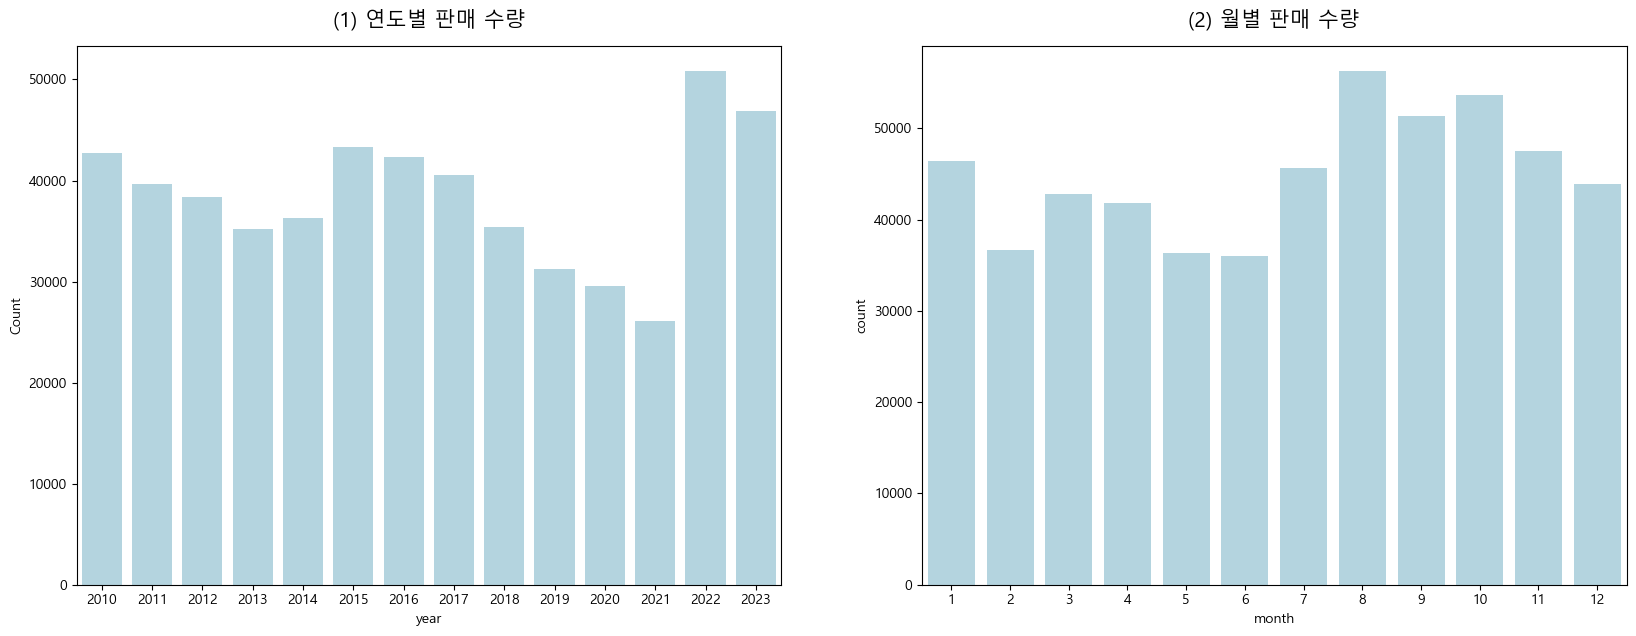

In [18]:
## 시각화
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=df, x='year', color='lightblue', ax=ax[0])
ax[0].set_title('(1) 연도별 판매 수량', fontsize=15, y=1.02)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)
ax[0].set_ylabel('Count')

sns.countplot(data=df, x='month', color='lightblue', ax=ax[1])
ax[1].set_title('(2) 월별 판매 수량', fontsize=15, y=1.02)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

plt.subplots_adjust(wspace=0.2)
plt.show()

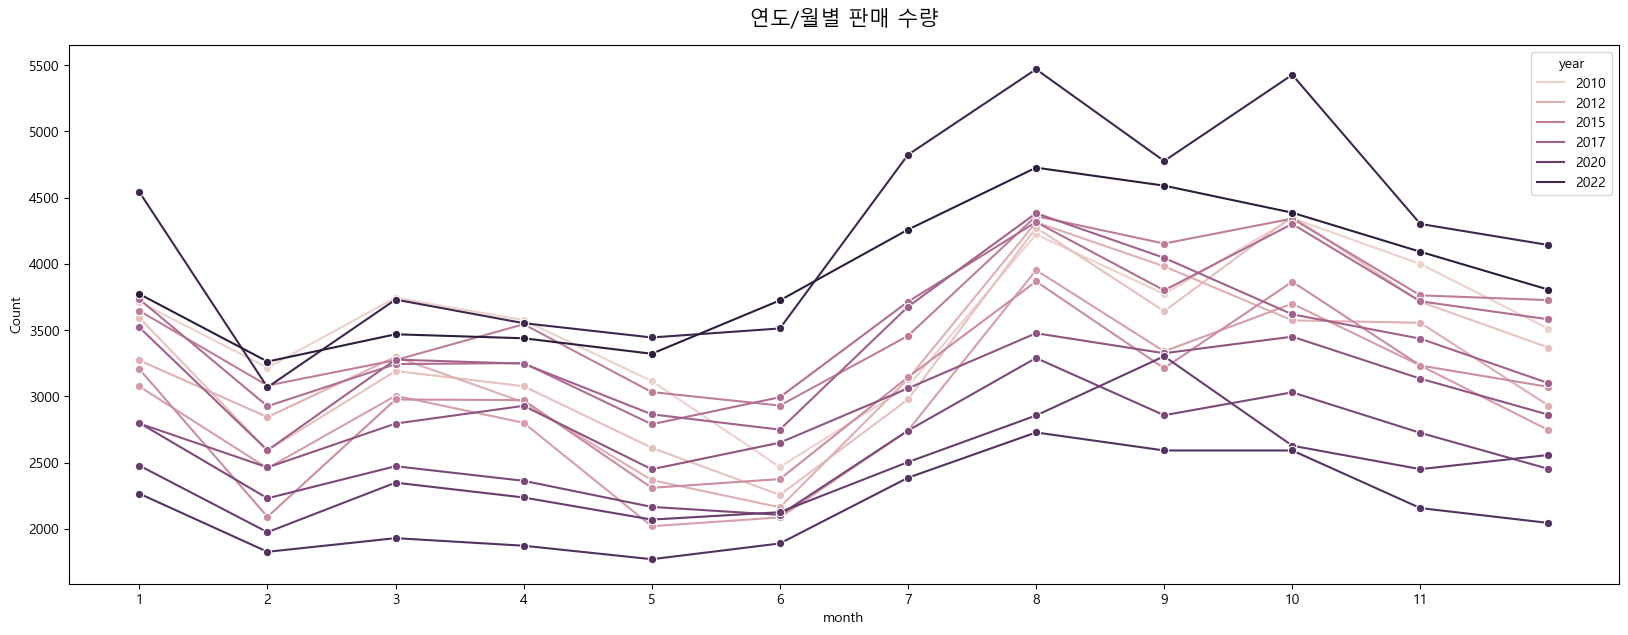

In [19]:
## 시각화
year_month = df.groupby(['year', 'month'])['shop_day'].count().reset_index()

plt.subplots(figsize=(20, 7))
sns.lineplot(data=year_month, x='month', y='shop_day', hue='year', marker='o')

plt.title('연도/월별 판매 수량', fontsize=15, y=1.02)
plt.ylabel('Count')
plt.xticks(range(1, 12, 1))
plt.show()

## 2.2 type_channel_new : 구매 장소

- 결측치 : 0개
- 구매 장소별 판매 수량 : 슈퍼마켓 >> 대형마트 > 전통시장 > 전문점 > ...

In [20]:
print('unique한 type_cannel_new 개수 : ', df['type_channel_new'].nunique())
df['type_channel_new'].unique()

unique한 type_cannel_new 개수 :  13


array(['슈퍼마켓', '대형마트', '백화점', '전통시장', '무점포', '기타', '온라인몰', '전문점', '편의점',
       '농가직거래', '정육점', '홈쇼핑', '외식업체'], dtype=object)

In [21]:
# 구매 장소별 판매 수량
df['type_channel_new'].value_counts(ascending=False)

type_channel_new
슈퍼마켓     243877
대형마트      96693
전통시장      83058
전문점       37061
무점포       28589
온라인몰      25961
백화점        7640
농가직거래      7459
편의점        3672
기타         3469
홈쇼핑         407
정육점         299
외식업체        197
Name: count, dtype: int64

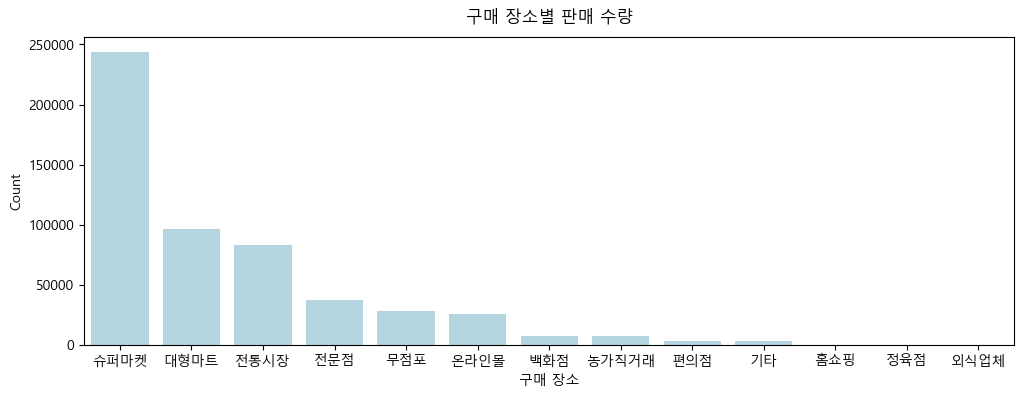

In [22]:
## 시각화
fig, ax = plt.subplots(figsize=(12, 4))

# 순서 정의
channel_order = df['type_channel_new'].value_counts(ascending=False).index

sns.countplot(data=df, x='type_channel_new', color='lightblue', order=channel_order)

ax.set_title('구매 장소별 판매 수량', y=1.02)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('구매 장소')
ax.set_ylabel('Count')
plt.show()

## 2.3 shop_day : 구입일

- 결측치 : 0 개
- 5113일 간의 판매 정보가 담긴 데이터
- datetime형 변환 후 day 칼럼 생성

In [23]:
print('unique한 shop_day 개수 : ', df['shop_day'].nunique())

unique한 shop_day 개수 :  5113


In [24]:
# 데이터 형태 확인
df['shop_day'].value_counts().head()

shop_day
2022-09-09    328
2022-08-27    283
2018-09-22    272
2015-09-26    270
2022-09-08    260
Name: count, dtype: int64

In [25]:
# datetime형 변환 
df['shop_day'] = pd.to_datetime(df['shop_day'])

# 확인
df['shop_day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 538382 entries, 0 to 538381
Series name: shop_day
Non-Null Count   Dtype         
--------------   -----         
538382 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 MB


In [26]:
# day 칼럼 생성
df['day'] = df['shop_day'].dt.day

# 확인
df[['shop_day', 'year', 'month', 'day']].tail(7)

,shop_day,year,month,day
538375,2023-12-10,2023,12,10
538376,2023-12-16,2023,12,16
538377,2023-12-16,2023,12,16
538378,2023-12-18,2023,12,18
538379,2023-12-21,2023,12,21
538380,2023-12-21,2023,12,21
538381,2023-12-25,2023,12,25


## 2.4 shop_week : 구입 요일

- 결측치 : 1개 → 처리o
- 구입 요일별 판매 수량 : 토요일 > 금요일 > 월요일

In [27]:
print('unique한 shop_week 개수 : ', df['shop_week'].nunique())
df['shop_week'].unique()

unique한 shop_week 개수 :  15


array([3, 2, 4, 6, 7, 1, 5, '2', '7', '1', '3', '6', '5', '4', '.'],
      dtype=object)

In [28]:
# shop_week이 '.'인 데이터 → 2019-11-23일 데이터
df[df['shop_week'] == '.']

,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,...,w_q_kg,retail_8,retail_new,take_out,panel_type,edit,family_num_level,age1_group,income_v2,day
381954,2019,11,슈퍼마켓,2019-11-23,.,공단소비자마트,인천,사과_국내산_,과일류,사과,...,.,3슈퍼마켓,슈퍼마켓,0,0.0,0,3,30,600~699만원,23


In [29]:
## shop_week의 '.' 대체
 
# 방법 : shop_week가 '.'인 데이터에서, 동일한 행의 shop_day에 따라 shop_week의 최빈값으로 '.' 값을 대체

# shop_week이 '.'인 데이터의 shop_day
change_day = df[df['shop_week'] == '.']['shop_day'].tolist()

# shop_week이 '.'인 데이터의 shop_day의 shop_week ('.' 포함)
print("shop_week이 '.'인 데이터의 shop_day의 shop_week ('.' 포함) : "
      , df[df['shop_day'].isin(change_day)]['shop_week'].unique().tolist())
print('---------------------------------------------------------------------------')


for i in df[df['shop_week'] == '.'].index :
    shop_day_value = df.loc[i, 'shop_day']

    # shop_day가 같은 행들의 shop_week 값 가져오기
    same_day_weeks = df[df['shop_day'] == shop_day_value]['shop_week']

    # 최빈값 값 계산 (단, '.' 제외)
    mode_value = same_day_weeks[same_day_weeks != '.'].mode()[0]

    # '.'을 유니크한 값으로 대체
    df.loc[i, 'shop_week'] = mode_value 


# 확인
print("shop_week이 '.'였던 데이터의 shop_day의 shop_week : "
      , df[df['shop_day'].isin(change_day)]['shop_week'].unique().tolist())

shop_week이 '.'인 데이터의 shop_day의 shop_week ('.' 포함) :  ['7', '.']
---------------------------------------------------------------------------
shop_week이 '.'였던 데이터의 shop_day의 shop_week :  ['7']


In [30]:
# 확인
print('unique한 shop_week 개수 : ', df['shop_week'].nunique())
df['shop_week'].unique()

unique한 shop_week 개수 :  14


array([3, 2, 4, 6, 7, 1, 5, '2', '7', '1', '3', '6', '5', '4'],
      dtype=object)

In [31]:
## 요일명 한글로 변경

# 문자열 정수형으로 변환
df['shop_week'] = df['shop_week'].astype(int)

# 숫자를 요일로 매핑
week_map = {1 : '일요일'
            , 2 : '월요일'
            , 3 : '화요일'
            , 4 : '수요일'
            , 5 : '목요일'
            , 6 : '금요일'
            , 7 : '토요일'}

df['shop_week'] = df['shop_week'].map(week_map)

In [32]:
# 확인
print('unique한 shop_week 개수 : ', len(df['shop_week'].unique()))
df['shop_week'].unique()

unique한 shop_week 개수 :  7


array(['화요일', '월요일', '수요일', '금요일', '토요일', '일요일', '목요일'], dtype=object)

In [33]:
# 요일별 판매 수량
df['shop_week'].value_counts(ascending=False)

shop_week
토요일    91287
금요일    79075
월요일    74635
목요일    74390
수요일    74030
화요일    72909
일요일    72056
Name: count, dtype: int64

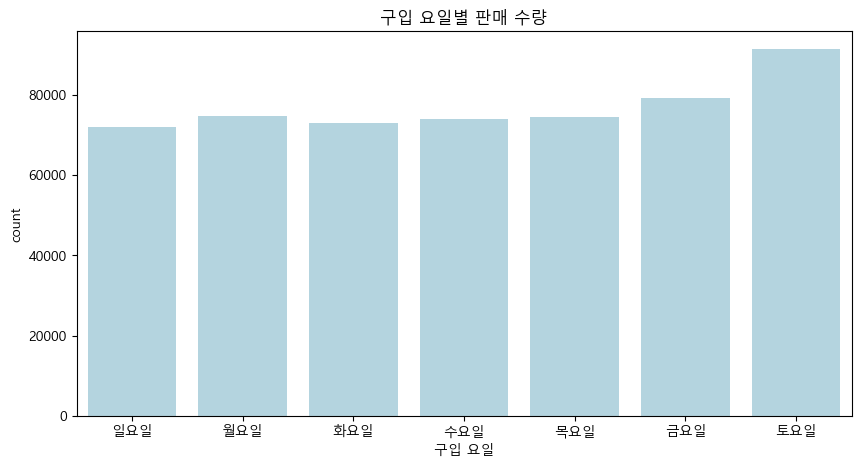

In [34]:
## 시각화
fig, ax = plt.subplots(figsize=(10, 5))

# 요일 순서
week_order = ['일요일', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일']

sns.countplot(data=df, x='shop_week', color='lightblue', order=week_order)

plt.title('구입 요일별 판매 수량')
plt.xlabel('구입 요일')
plt.show()

## 2.5 store : 상점명

- 결측치 : 29 (약 0.005387%) → 처리x

In [35]:
print('unique한 store 개수 : ', df['store'].nunique())
df['store'].unique()

unique한 store 개수 :  24339


array(['하나로클럽고양점', '소형슈퍼마켓', '이마트일산점', ..., '남촌농산물도매시장인농254또맛나상회',
       'GSTHEFRESH연수점', '무점포이레유통'], dtype=object)

In [36]:
df['store'].value_counts()

store
소형슈퍼마켓            60792
재래시장              40018
대형슈퍼마켓            27627
없음                16524
전문점               15250
                  ...  
관우농장                  1
장보남몰옥션                1
인천모래내시장오빠네과일야채        1
드림홈마트(도화점)            1
무점포이레유통               1
Name: count, Length: 24339, dtype: int64

### 2.5.1 결측치 확인

In [37]:
pd.set_option('display.max_columns', 50)
df[df['store'].isna()].head()

,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,detail,purchase,discount,quantity,q_unit,weight_quantity,multi_quantity,w_q_kg,retail_8,retail_new,take_out,panel_type,edit,family_num_level,age1_group,income_v2,day
416593,2021,1,슈퍼마켓,2021-01-26,화요일,NaN,경기,DOLE스위티오파인애풀필리핀,과일류,파인애플,파인애플,2380.0,.,2,NaN,.,.,.,3슈퍼마켓,기업형슈퍼마켓,0,15.0,0,2,60,200~299만원,26
416948,2021,2,슈퍼마켓,2021-02-01,월요일,NaN,경기,배_신고_이정태_,과일류,배,신고배,7900.0,.,1,NaN,12,4,12,3슈퍼마켓,기업형슈퍼마켓,0,0.0,0,4,50,700만원 이상,1
424818,2021,6,전문점,2021-06-26,토요일,NaN,강원,냇강마을블루베리,과일류,베리,블루베리,10000.0,.,2,NaN,500,1,1,5전문점,전문점,0,0.0,0,3,50,500~599만원,26
424824,2021,6,전문점,2021-06-26,토요일,NaN,강원,블루베리_관대리_,과일류,베리,블루베리,5000.0,.,1,NaN,250,1,0,5전문점,전문점,0,0.0,0,3,50,500~599만원,26
426287,2021,7,슈퍼마켓,2021-07-19,월요일,NaN,경기,황도복숭아,과일류,복숭아,황도,19800.0,.,1,BOX,.,18,.,3슈퍼마켓,슈퍼마켓,0.0,0.0,0,3,50,700만원 이상,19


## 2.6 store_region : 구매 지역

- 결측치 : 4115개 (약0.764327%)
- store이 동일한 쿠팡, 마켓컬리여도 store_region이 null, 없음으로 데이터 산재되어 있음 → 데이터 통일해야 할까?

In [38]:
print('unique한 store_region 개수 : ', df['store_region'].nunique())
df['store_region'].unique()

unique한 store_region 개수 :  19


array(['경기', '없음', '서울', '인천', '전남', '강원', '제주', '광주', '대전', '충남', '경북',
       '경남', '부산', '전북', '충북', '세종', '대구', '울산', '기타', nan], dtype=object)

In [39]:
# 지역별 판매 비율
df['store_region'].value_counts(normalize=True).head(7)

store_region
경기    0.440903
서울    0.334224
없음    0.124054
인천    0.090769
강원    0.001827
충남    0.001361
제주    0.001314
Name: proportion, dtype: float64

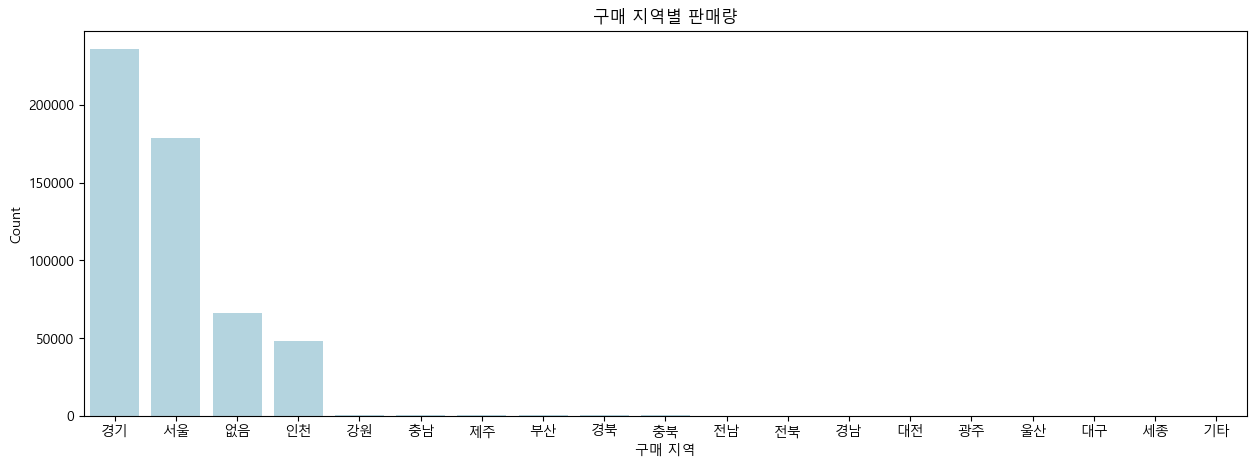

In [40]:
## 구매 지역별 시각화 
fix, ax = plt.subplots(figsize=(15, 5))

# 순서
store_region_order = df['store_region'].value_counts(ascending=False).index

sns.countplot(data=df, x='store_region', color='lightblue', order=store_region_order)

plt.title('구매 지역별 판매량')
plt.xlabel('구매 지역')
plt.ylabel('Count')
plt.show()

In [41]:
# store_region이 '없음'인 데이터 확인 1
print("store_region이 '없음'인 데이터 중 store 빈도수 Top10 : \n"
      , df[df['store_region'] == '없음']['store'].value_counts(ascending=False).head(10).index.tolist())

store_region이 '없음'인 데이터 중 store 빈도수 Top10 : 
 ['없음', '노점', '산지직거래', '쿠팡', '기타', '마켓컬리', '농가직거래(방문,기타)', '인터넷구매', '이마트몰', '재래시장']


In [42]:
# store_region이 '없음'인 데이터 확인 2
print("store_region이 '없음'인 데이터의 unique한 store수 : ", df[df['store_region'] == '없음']['store'].nunique())
df[df['store_region'] == '없음']['store'].value_counts(ascending=False)

store_region이 '없음'인 데이터의 unique한 store수 :  4440


store
없음            14583
노점            13364
산지직거래          3001
쿠팡             2805
기타             2800
              ...  
애플펙토리             1
세이브마트(논현)         1
옥션추왕산털보네사과        1
이마트몰이마트양주점        1
오라방쇼핑고흥몰          1
Name: count, Length: 4440, dtype: int64

In [43]:
# store_region이 '기타'인 데이터 확인 1
print("store_region이 '기타'인 데이터 중 store 빈도수 Top10 : \n"
      , df[df['store_region'] == '기타']['store'].value_counts(ascending=False).head(10).index.tolist())

store_region이 '기타'인 데이터 중 store 빈도수 Top10 : 
 ['이마트트레이더스']


In [44]:
# store_region이 '기타'인 데이터 확인 2
df[df['store_region'] == '기타']['store'].value_counts(ascending=False)

store
이마트트레이더스    2
Name: count, dtype: int64

### 2.6.1 결측치 확인

In [45]:
pd.set_option('display.max_columns', 50)
df[df['store_region'].isna()].head(3)

,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,detail,purchase,discount,quantity,q_unit,weight_quantity,multi_quantity,w_q_kg,retail_8,retail_new,take_out,panel_type,edit,family_num_level,age1_group,income_v2,day
451722,2022,3,온라인몰,2022-03-31,목요일,마켓컬리,NaN,DOLE실속바나나_필리핀산_,과일류,바나나,일반바나나,2980.0,.,1,개,1,.,NaN,NaN,NaN,NaN,21.0,.,1,30,300~399만원,31
451726,2022,3,온라인몰,2022-03-31,목요일,마켓컬리,NaN,블랙라벨고당도오렌지_미국산,과일류,오렌지,오렌지,9900.0,.,1,개,12,8,NaN,NaN,NaN,NaN,21.0,.,1,30,300~399만원,31
452102,2022,4,온라인몰,2022-04-25,월요일,산들앤달코미스테바나나,NaN,세척사과_국산_,과일류,사과,기타사과,39000.0,.,2,BOX,6,.,NaN,NaN,NaN,NaN,0.0,.,3,50,700만원 이상,25


In [46]:
# store_region이 null값인 데이터 확인
print('store_region이 null값인 데이터 중 store 빈도수 Top10 : \n'
      , df[df['store_region'].isna()]['store'].value_counts(ascending=False).head(10).index.tolist())

store_region이 null값인 데이터 중 store 빈도수 Top10 : 
 ['마켓컬리', '쿠팡', '무점포', '없음없음', '오아시스', '이마트몰', '쿠팡로켓프레시', '오아시스마켓', '11번가이마트몰', '농가직거래']


## 2.7 wide : 대분류

- 결측치 : 0개

In [47]:
print('unique한 wide 개수 : ', df['wide'].nunique())
df['wide'].unique()

unique한 wide 개수 :  1


array(['과일류'], dtype=object)

## 2.8 middle : 중분류

- 결측치 : 0개

In [48]:
print('unique한 middle 개수 : ', df['middle'].nunique())
df['middle'].unique()

unique한 middle 개수 :  19


array(['배', '바나나', '감귤', '사과', '단감', '레몬', '떫은감', '오렌지', '참다래', '기타과일',
       '복숭아', '열대과일', '파인애플', '포도', '베리', '체리', '묶음과일', '매실', '자두'],
      dtype=object)

In [49]:
# 중분류별 판매 수량
df['middle'].value_counts(ascending=False)

middle
바나나     114662
사과       92965
감귤       70083
포도       52877
복숭아      37042
오렌지      24198
배        22615
단감       22509
참다래      17518
떫은감      14823
자두       13814
열대과일     12927
기타과일     12573
파인애플      9155
체리        8171
베리        6693
레몬        3873
매실        1684
묶음과일       200
Name: count, dtype: int64

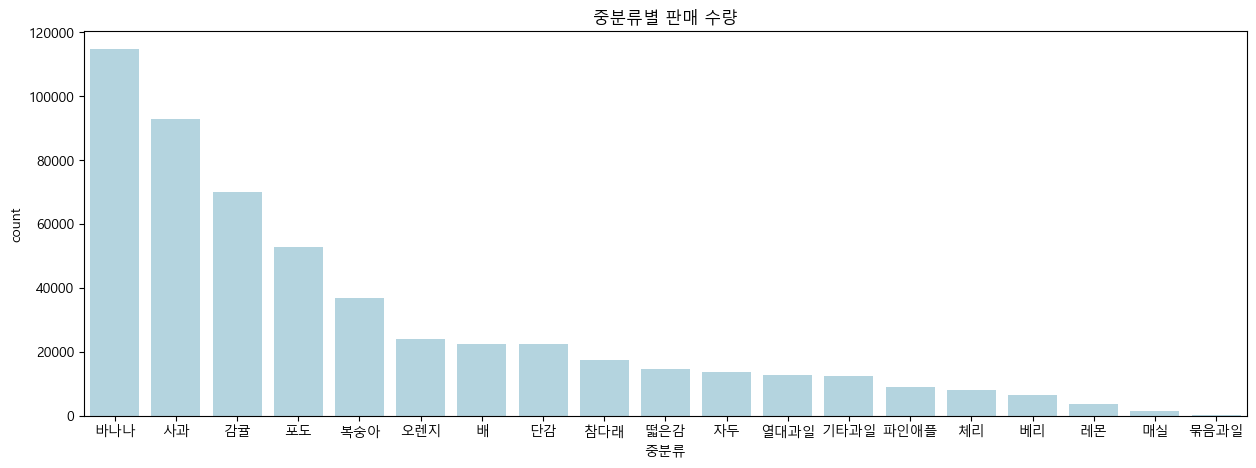

In [50]:
## 중분류별 시각화
fig, ax = plt.subplots(figsize=(15, 5))

# 순서 정의
middle_order = df['middle'].value_counts(ascending=False).index

sns.countplot(data=df, x='middle', color='lightblue', order=middle_order)

plt.title('중분류별 판매 수량')
plt.xlabel('중분류')
plt.show()

## 2.9 detail : 소분류

- 결측치 : 0개

In [51]:
print('unique한 detail 개수 : ', df['detail'].nunique())
df['detail'].unique()

unique한 detail 개수 :  59


array(['기타배', '일반바나나', '밀감', '기타사과', '단감', '레몬', '후지', '신고배', '일반떫은감',
       '대봉시', '오렌지', '홍시', '그린키위', '기타과일', '천도', '기타키위', '자몽', '골드키위',
       '파인애플', '대봉', '한라봉', '기타바나나', '석류', '기타포도', '캠벨얼리', '유자', '기타감귤',
       '청견', '세리단', '금귤', '복분자', '기타열대과일', '황도', '적포도', '기타베리', '블루베리',
       '체리', '청포도', '망고', '거봉', '무화과', '묶음과일', '머루포도_MBA_', '매실', '홍로',
       '혼합과일', '델라웨어', '자두', '일반복숭아', '오디', '아오리', '백도', '홍옥', '킹델라웨어',
       '반시', '모과', '기타복숭아', '기타감', '올리브'], dtype=object)

In [52]:
# 소분류별 판매 수량
df['detail'].value_counts(ascending=False)

detail
일반바나나        113884
기타사과          72603
밀감            59945
오렌지           24198
단감            22509
일반복숭아         21112
기타배           17147
기타포도          15822
청포도           14251
자두            13814
후지            11590
천도            11367
파인애플           9155
기타과일           8989
골드키위           8239
체리             8171
홍시             7589
캠벨얼리           7103
거봉             6998
블루베리           5876
적포도            5622
신고배            5468
아오리            5048
그린키위           4835
기타감귤           4739
한라봉            4515
기타키위           4444
기타열대과일         4319
레몬             3873
망고             3604
홍로             3306
황도             3000
대봉             2972
자몽             2518
무화과            2508
머루포도_MBA_      2506
석류             2455
일반떫은감          2036
매실             1684
백도             1496
대봉시            1314
반시              896
기타바나나           778
금귤              650
기타베리            594
델라웨어            468
홍옥              418
혼합과일            350
오디              286
유자           

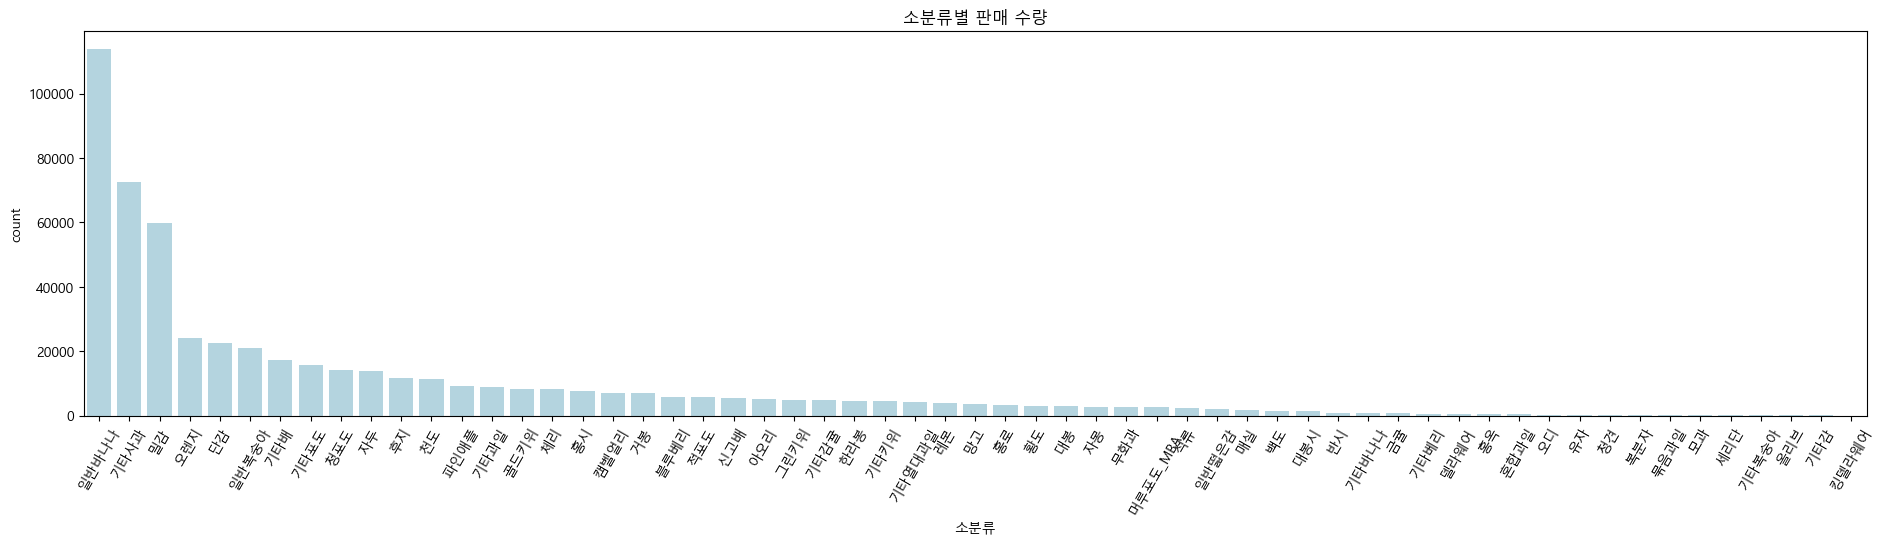

In [53]:
## 소분류별 시각화
fig, ax = plt.subplots(figsize=(23, 5))

# 순서 정의
detail_order = df['detail'].value_counts(ascending=False).index

sns.countplot(data=df, x='detail', color='lightblue', order=detail_order)

plt.title('소분류별 판매 수량')
plt.xlabel('소분류')
plt.xticks(rotation=60)
plt.show()

## 2.10 middle & detail

- 중분류가 '포도'인 경우 9개의 소분류를 가지고 있음
- 중분류가 묶음과일, 매실, 레몬, 단감, 오렌지, 자두, 체리, 파인애플인 경우 1개의 소분류를 가지고 있음

In [54]:
# middle 별 detail 종류
df.groupby('middle')['detail'].unique()

middle
감귤                                [밀감, 한라봉, 기타감귤, 청견, 금귤]
기타과일                        [기타과일, 유자, 무화과, 혼합과일, 오디, 모과]
단감                                                   [단감]
떫은감                         [일반떫은감, 대봉시, 홍시, 대봉, 반시, 기타감]
레몬                                                   [레몬]
매실                                                   [매실]
묶음과일                                               [묶음과일]
바나나                                        [일반바나나, 기타바나나]
배                                              [기타배, 신고배]
베리                                      [복분자, 기타베리, 블루베리]
복숭아                            [천도, 황도, 일반복숭아, 백도, 기타복숭아]
사과                                [기타사과, 후지, 홍로, 아오리, 홍옥]
열대과일                            [자몽, 석류, 기타열대과일, 망고, 올리브]
오렌지                                                 [오렌지]
자두                                                   [자두]
참다래                                    [그린키위, 기타키위, 골드키위]
체리                                                   [체리]
파인애플   

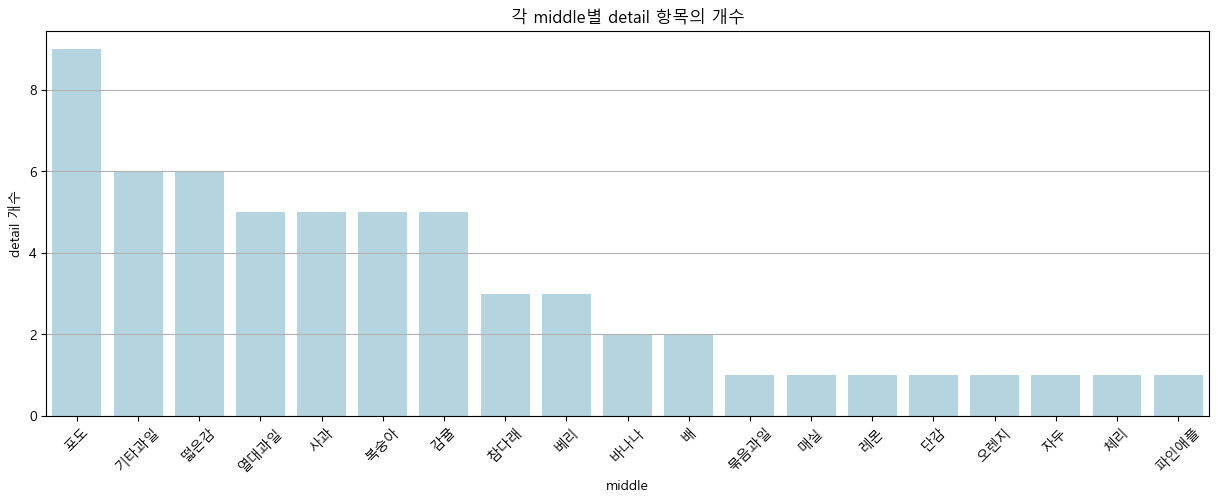

In [55]:
## 시각화
fig, ax = plt.subplots(figsize=(15, 5))

# 동일한 middle 내에서 중복되지 않는 detail의 개수
detail_count = df.groupby('middle')['detail'].nunique().reset_index()

# 순서 정의
md_order = detail_count.sort_values(by='detail', ascending=False)['middle'].tolist()

sns.barplot(data=detail_count, x='middle', y='detail', order=md_order, color='lightblue')

plt.title('각 middle별 detail 항목의 개수')
plt.ylabel('detail 개수')
plt.xlabel('middle')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Text(0.5, 1.0, 'detail별 판매 수량 (포도)')

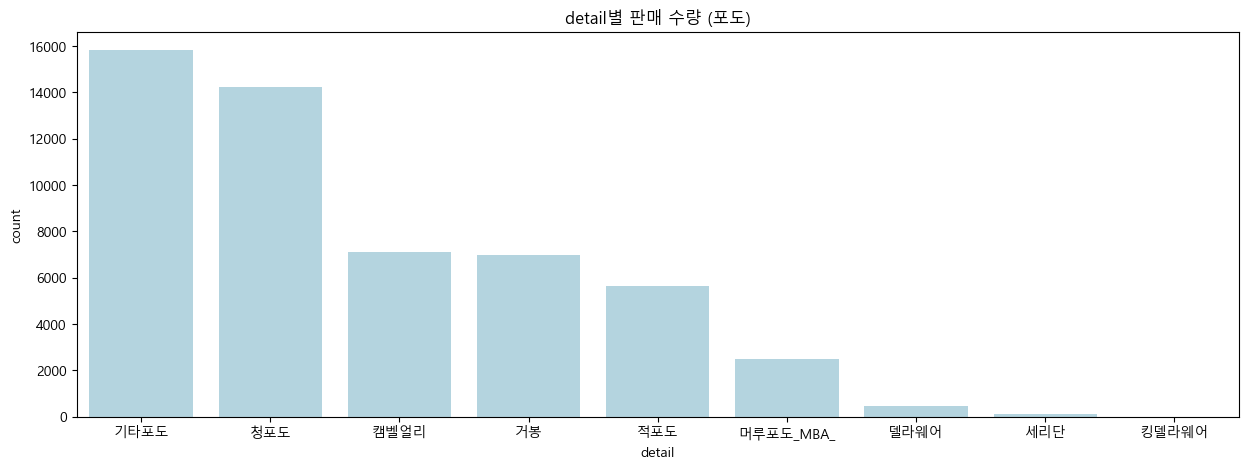

In [56]:
## 시각화
fig, ax = plt.subplots(figsize=(15, 5))

# 데이터 준비
df_grape = df[df['middle'] == '포도'].copy()

# 순서
grape_order = df_grape['detail'].value_counts(ascending=False).index

sns.countplot(data=df_grape, x='detail', color='lightblue', order=grape_order)

plt.title('detail별 판매 수량 (포도)')

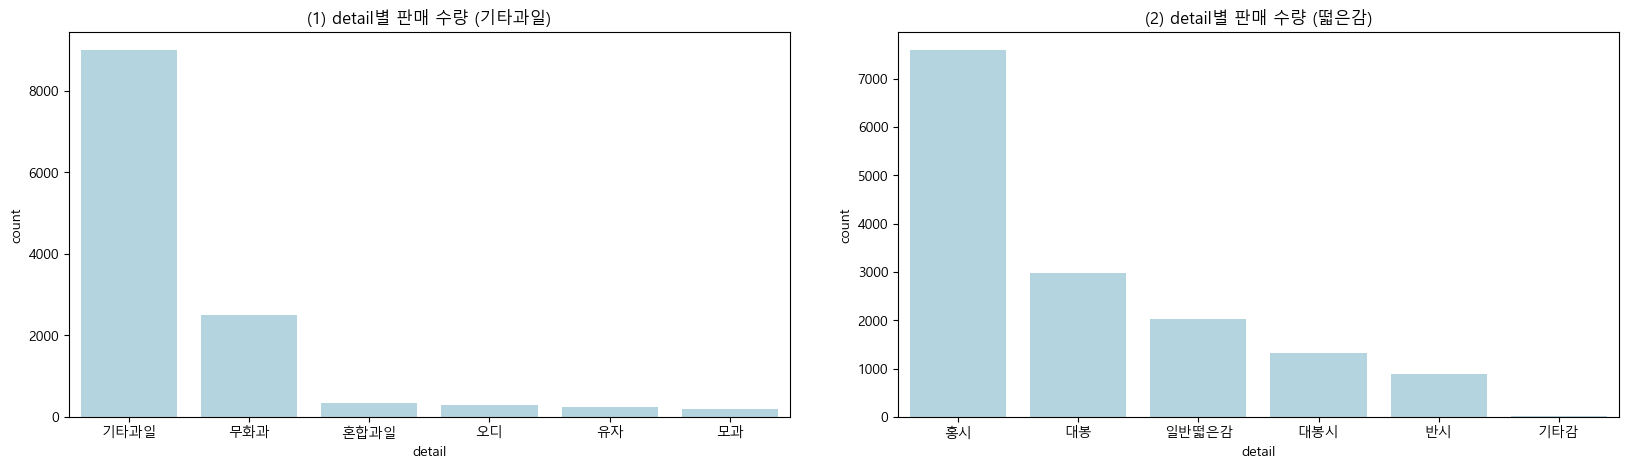

In [57]:
## 시각화
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# (1) 기타 과일
df_etc = df[df['middle'] == '기타과일'].copy()
etc_order = df_etc['detail'].value_counts(ascending=False).index

sns.countplot(data=df_etc, x='detail', color='lightblue', order=etc_order, ax=ax[0])

ax[0].set_title('(1) detail별 판매 수량 (기타과일)')


# (2) 떫은감
df_per = df[df['middle'] == '떫은감'].copy()
per_order = df_per['detail'].value_counts(ascending=False).index

sns.countplot(data=df_per, x='detail', color='lightblue', order=per_order, ax=ax[1])

ax[1].set_title('(2) detail별 판매 수량 (떫은감)')

plt.subplots_adjust(wspace=0.15)
plt.show()

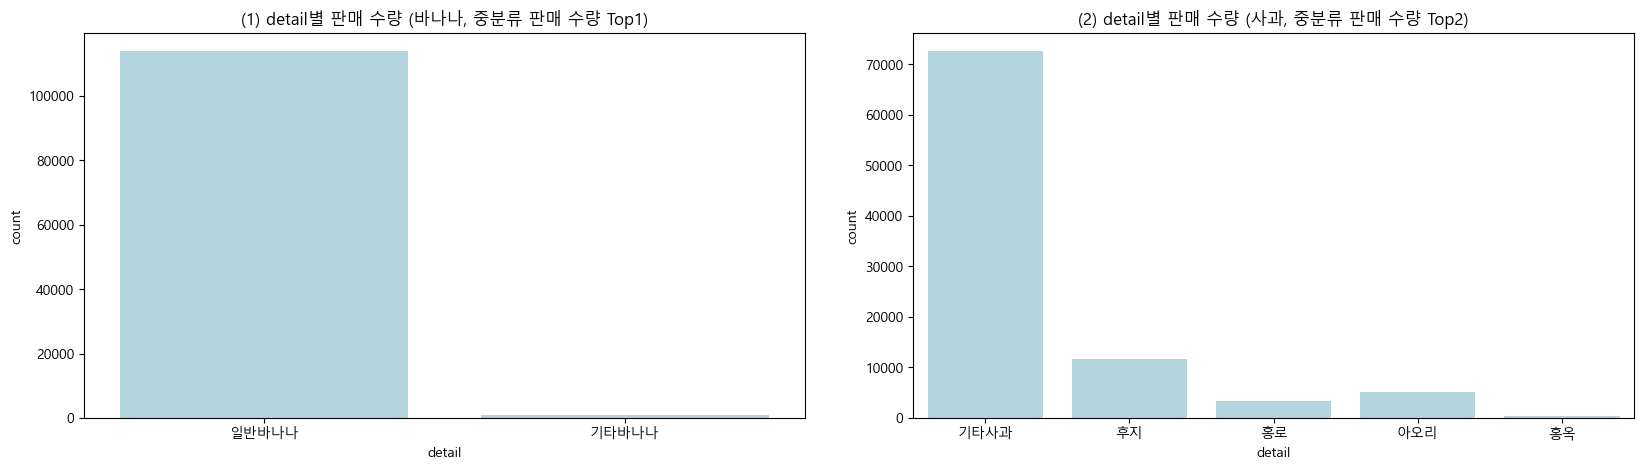

In [58]:
## 시각화
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# 바나나 (중분류 판매 수량 Top1)
df_banana = df[df['middle'] == '바나나'].copy()
sns.countplot(data=df_banana, x='detail', color='lightblue', ax=ax[0])
ax[0].set_title('(1) detail별 판매 수량 (바나나, 중분류 판매 수량 Top1)')

# 사과 (중분류 판매 수량 Top2)
df_apple = df[df['middle'] == '사과'].copy()
sns.countplot(data=df_apple, x='detail', color='lightblue', ax=ax[1])
ax[1].set_title('(2) detail별 판매 수량 (사과, 중분류 판매 수량 Top2)')

plt.subplots_adjust(wspace=0.15)
plt.show()

## 2.11 family_num_level : 가구 구성원 수

- 결측치 : 0개

In [59]:
print('unique한 family_num_level 개수 : ', df['family_num_level'].nunique())
df['family_num_level'].unique()

unique한 family_num_level 개수 :  7


array([3, 4, 5, 2, 6, 1, 7], dtype=int64)

In [60]:
# 가족 구성원수별 판매 수량
df['family_num_level'].value_counts(ascending=False)

family_num_level
4    211877
3    145305
2     90048
5     41226
1     36210
6     13677
7        39
Name: count, dtype: int64

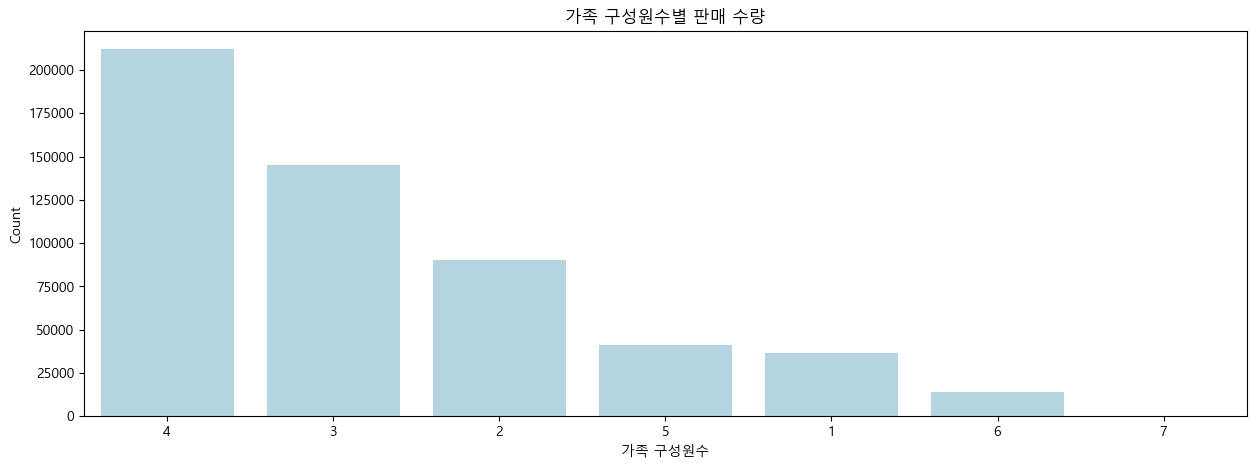

In [61]:
## 가족 구성원수별 시각화 
fix, ax = plt.subplots(figsize=(15, 5))

# 순서
family_order = df['family_num_level'].value_counts(ascending=False).index

sns.countplot(data=df, x='family_num_level', color='lightblue', order=family_order)

plt.title('가족 구성원수별 판매 수량')
plt.xlabel('가족 구성원수')
plt.ylabel('Count')
plt.show()

## 2.12 age1_group : 당시 나이대

- 결측치 : 0개

In [62]:
print('unique한 age1_group 개수 : ', df['age1_group'].nunique())
df['age1_group'].unique()

unique한 age1_group 개수 :  7


array([40, 50, 30, 60, 20, 70, 80], dtype=int64)

In [63]:
# 나이대별 구매 수량
df['age1_group'].value_counts(ascending=False)

age1_group
50    178621
40    174914
60    108786
30     68280
70      6312
20      1363
80       106
Name: count, dtype: int64

In [64]:
# age1_group 변환 함수
def change_age(x) :
    if x == 20 :
        return '20대 이하'
    elif x == 30 :
        return '30대'
    elif x == 40 :
        return '40대'
    elif x == 50 :
        return '50대'
    elif x == 60 :
        return '60대'
    elif x == 70 :
        return '70대'
    else :
        return '80대 이상'

In [65]:
# 함수 적용 
df['age1_group'] = df['age1_group'].apply(change_age)

# 확인
print('df의 age1_group : ', df['age1_group'].unique())

df의 age1_group :  ['40대' '50대' '30대' '60대' '20대 이하' '70대' '80대 이상']


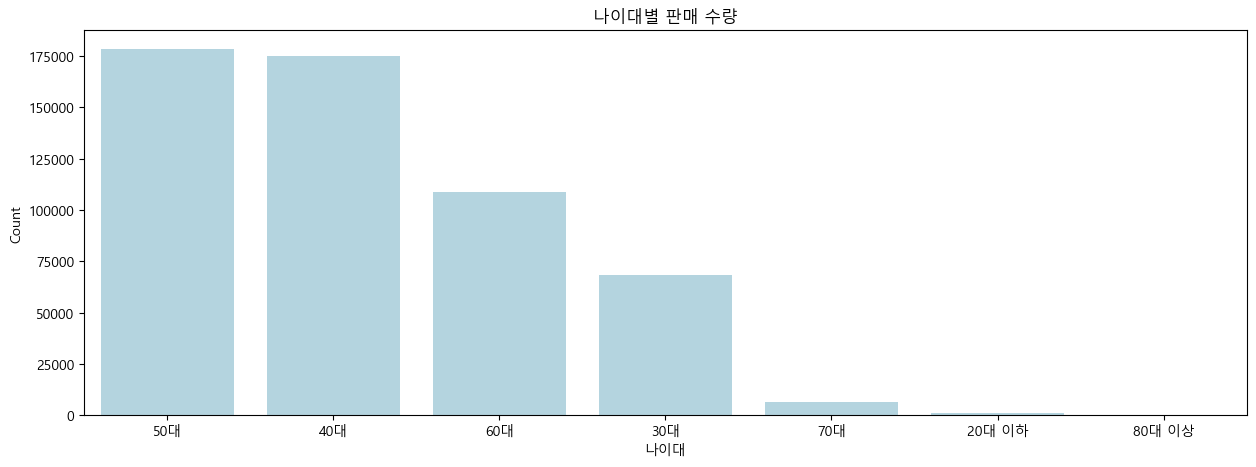

In [66]:
## 시각화 
fix, ax = plt.subplots(figsize=(15, 5))

# 순서
age_order = df['age1_group'].value_counts(ascending=False).index

sns.countplot(data=df, x='age1_group', color='lightblue', order=age_order)

plt.title('나이대별 판매 수량')
plt.xlabel('나이대')
plt.ylabel('Count')
plt.show()

## 2.13 income_v2 : 가구 소득

- 결측치 : 0개

In [67]:
print('unique한 income_v2 개수 : ', df['income_v2'].nunique())
df['income_v2'].unique()

unique한 income_v2 개수 :  7


array(['200만원 미만', '300~399만원', '400~499만원', '200~299만원', '500~599만원',
       '700만원 이상', '600~699만원'], dtype=object)

In [68]:
# 가구 소득별 판매 수량
df['income_v2'].value_counts(ascending=False)

income_v2
300~399만원    102187
700만원 이상      95239
400~499만원     92020
200~299만원     75993
500~599만원     67517
200만원 미만      60482
600~699만원     44944
Name: count, dtype: int64

In [69]:
# income_v2 변환 함수
def change_income(x) :
    if x == '200만원 미만' :
        return '200만원 미만'
    elif x == '200~299만원' :
        return '200만원대'
    elif x == '300~399만원' :
        return '300만원대'
    elif x == '400~499만원' :
        return '400만원대'
    elif x == '500~599만원' :
        return '500만원대'
    elif x == '600~699만원' :
        return '600만원대'
    else :
        return '700만원 이상'

In [70]:
# 함수 적용 
df['income_v2'] = df['income_v2'].apply(change_income)

# 확인
print('df의 income_v2 : ', df['income_v2'].unique())

df의 income_v2 :  ['200만원 미만' '300만원대' '400만원대' '200만원대' '500만원대' '700만원 이상' '600만원대']


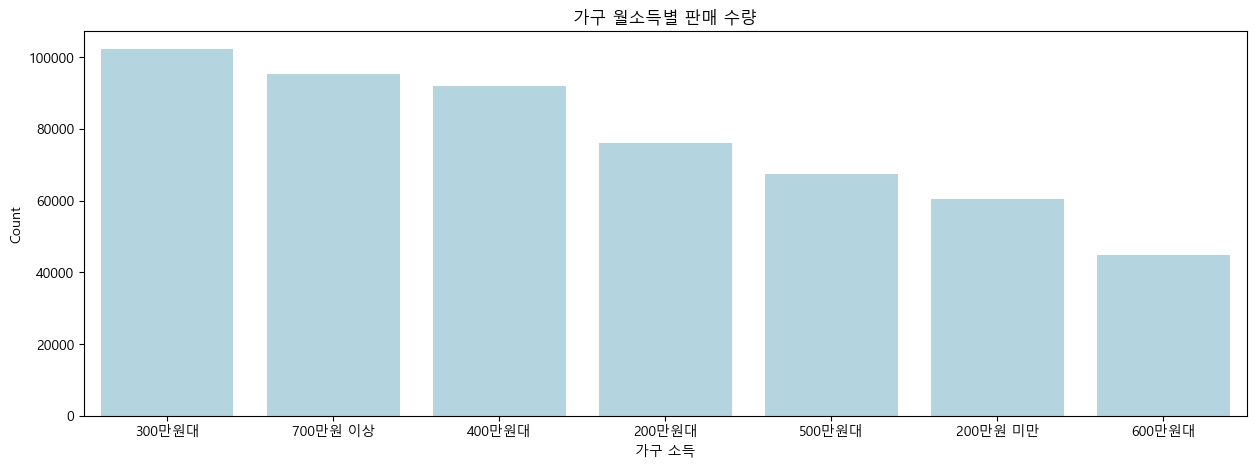

In [71]:
## 시각화 
fix, ax = plt.subplots(figsize=(15, 5))

# 순서
income_order = df['income_v2'].value_counts(ascending=False).index

sns.countplot(data=df, x='income_v2', color='lightblue', order=income_order)

plt.title('가구 월소득별 판매 수량')
plt.xlabel('가구 소득')
plt.ylabel('Count')
plt.show()

## 2.14 purchase : 구입액 (상품 구입시 실제 지출한 금액)

- 결측치 : 0개
- Q3(1만원)과 MAX(120만원) 사이 간경이 매우 넓은 비대칭적 구조
- 실수형을 소수점 뒤를 절삭하고 정수형으로 변환
- 구매 금액을 grouping하는게 좋을까 ?

In [72]:
print('unique한 purchase 개수 : ', df['purchase'].nunique())
df['purchase'].unique()

unique한 purchase 개수 :  8258


array([ 5900.,  1500.,  8000., ...,  8755.,  9917., 19984.])

In [73]:
# 확인 → 비대칭적 분포
pd.set_option('display.float_format', '{:.2f}'.format)
df['purchase'].describe()

count    538382.00
mean       8194.96
std       10286.84
min           2.00
25%        3500.00
50%        5000.00
75%       10000.00
max     1200000.00
Name: purchase, dtype: float64

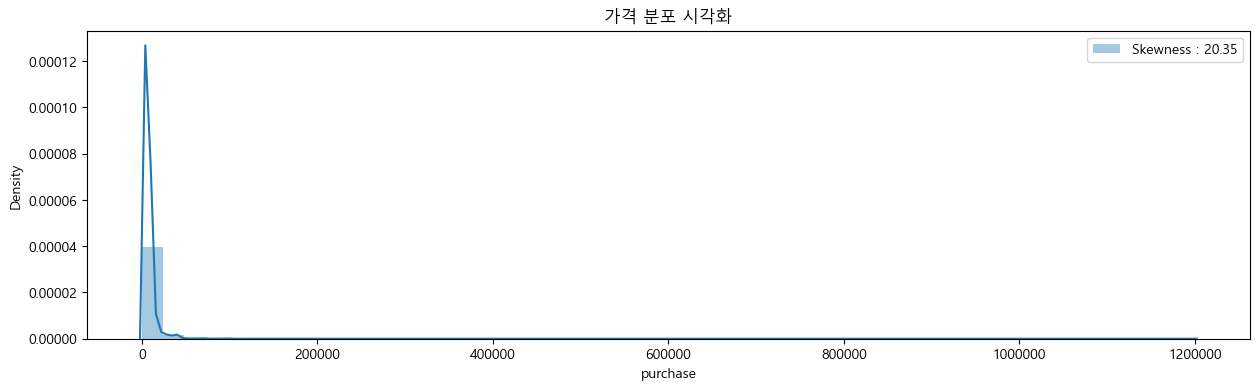

In [74]:
## 가격 분포 시각화
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(figsize=(15, 4))

# displot : 히스토그램 + 커널 밀도 추정
sns.distplot(df['purchase'], label='Skewness : {:.2f}'.format(df['purchase'].skew()))

# 지수 표기법 비활성화
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))
ax.ticklabel_format(style='plain', axis='x')

plt.title('가격 분포 시각화')
plt.legend()
plt.show()

# 해석
# 비대칭적 구조 (high skewness)

In [75]:
# 단감이 2원이구나,,,
df[df['purchase'] == df['purchase'].min()]

,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,detail,purchase,discount,quantity,q_unit,weight_quantity,multi_quantity,w_q_kg,retail_8,retail_new,take_out,panel_type,edit,family_num_level,age1_group,income_v2,day
195472,2015,1,슈퍼마켓,2015-01-12,월요일,대형슈퍼마켓,경기,단감,과일류,단감,단감,2.00,.,1,봉,.,.,.,3슈퍼마켓,슈퍼마켓,0,15.00,1,1,50대,200만원 미만,12


In [76]:
# 120만원짜리 베리라,,,
df[df['purchase'] == df['purchase'].max()]

,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,detail,purchase,discount,quantity,q_unit,weight_quantity,multi_quantity,w_q_kg,retail_8,retail_new,take_out,panel_type,edit,family_num_level,age1_group,income_v2,day
122578,2013,1,기타,2013-01-07,월요일,기타,없음,아사이베리,과일류,베리,기타베리,1200000.00,NaN,14,박스,.,30,.,8기타,기타,0,0.00,0,6,40대,700만원 이상,7


In [77]:
# purchase 열에서 소수점 뒤에 값이 있는 데이터 확인 → 소수점 뒤 아예 버려버리기
df[df['purchase'] % 1 != 0]

,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,detail,purchase,discount,quantity,q_unit,weight_quantity,multi_quantity,w_q_kg,retail_8,retail_new,take_out,panel_type,edit,family_num_level,age1_group,income_v2,day
432035,2021,9,전문점,2021-09-16,목요일,두레생협연합경기남부두레죽전점,경기,농_단_복숭아_황도,과일류,복숭아,황도,28243.20,6,1,NaN,4,.,4,5전문점,전문점,0.00,0.00,0,3,50대,500만원대,16


In [78]:
# 실수형에서 수치형으로 변환
df['purchase'] = df['purchase'].astype('int')

# 확인
df['purchase'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 538382 entries, 0 to 538381
Series name: purchase
Non-Null Count   Dtype
--------------   -----
538382 non-null  int32
dtypes: int32(1)
memory usage: 2.1 MB


## 2.15 quantity : 수량 (구매 개수)

- 결측치 : 0개
- 변환 (1) : quantity가 0과 .인 데이터는 모두 1로 변환
- 변환 (2) : 소수점 아래에 숫자가 있는 값은 올림 (ex 5.5 → 6.)

In [79]:
print('unique한 quantity 개수 : ', df['quantity'].nunique())
df['quantity'].unique()

unique한 quantity 개수 :  142


array([1, 2, 3, 10, 4, 5, 9, 6, 7, 8, 17, 14, 12, 25, 15, 20, 100, 24, 33,
       18, 54, 16, 30, 11, 13, 60, 26, 23, 0, 36, 50, 38, 27, 58, 19, 22,
       75, 70, 64, 43, 56, 31, 32, 28, 39, 45, 80, 52, 48, 65, 40, 35, 59,
       29, 63, 90, 102, 44, 21, 47, 72, 57, 34, 42, 41, 73, 69, 53, 37,
       '1', '2', '10', '3', '12', '7', '15', '5', '6', '20', '4', '8',
       '14', '16', '13', '0', '9', '18', '25', '40', '24', '.', '21',
       '36', '38', '11', '30', '17', '19', '27', '160', '37', '65', '50',
       '34', '46', '22', '35', '70', '80', '57', 55, '23', '28', '26',
       '45', '100', '54', '44', '60', 66, 68, 46, 88, 153, 62, 240, 51,
       82, 92, '32', '52', '59', '90', '42', '31', 84, 120, 85.0, 0.5,
       0.3, 5.5, 74.0], dtype=object)

In [80]:
# 확인
print('quantity가 0인 row 수 : ', len(df[df['quantity'] == '0']))
print('quantity가 .인 row 수 : ', len(df[df['quantity'] == '.']))

quantity가 0인 row 수 :  4
quantity가 .인 row 수 :  8


In [81]:
## quantity 정리

# 변환 1) 0과 .인 데이터는 모두 1로 변환
df.loc[(df['quantity'] == '0') | (df['quantity'] == '.'), 'quantity'] = 1

# 실수형으로 변환
df['quantity'] = df['quantity'].astype('float')


# 변환 2) 소수점 아래에 숫자가 있는 값만 올림하고, 나머지 실수는 그대로 유지
df['quantity'] = df['quantity'].apply(lambda x : np.ceil(x) if x % 1 != 0 else x)

# 정수형으로 변환
df['quantity'] = df['quantity'].astype('int')

In [82]:
print('unique한 quantity 개수 : ', df['quantity'].nunique())
df['quantity'].unique()

unique한 quantity 개수 :  85


array([  1,   2,   3,  10,   4,   5,   9,   6,   7,   8,  17,  14,  12,
        25,  15,  20, 100,  24,  33,  18,  54,  16,  30,  11,  13,  60,
        26,  23,   0,  36,  50,  38,  27,  58,  19,  22,  75,  70,  64,
        43,  56,  31,  32,  28,  39,  45,  80,  52,  48,  65,  40,  35,
        59,  29,  63,  90, 102,  44,  21,  47,  72,  57,  34,  42,  41,
        73,  69,  53,  37, 160,  46,  55,  66,  68,  88, 153,  62, 240,
        51,  82,  92,  84, 120,  85,  74])

In [83]:
# 확인
print('타입 확인 : ', df['quantity'].dtypes)
display(df['quantity'].describe())

타입 확인 :  int32


count   538382.00
mean         2.02
std          3.15
min          0.00
25%          1.00
50%          1.00
75%          1.00
max        240.00
Name: quantity, dtype: float64

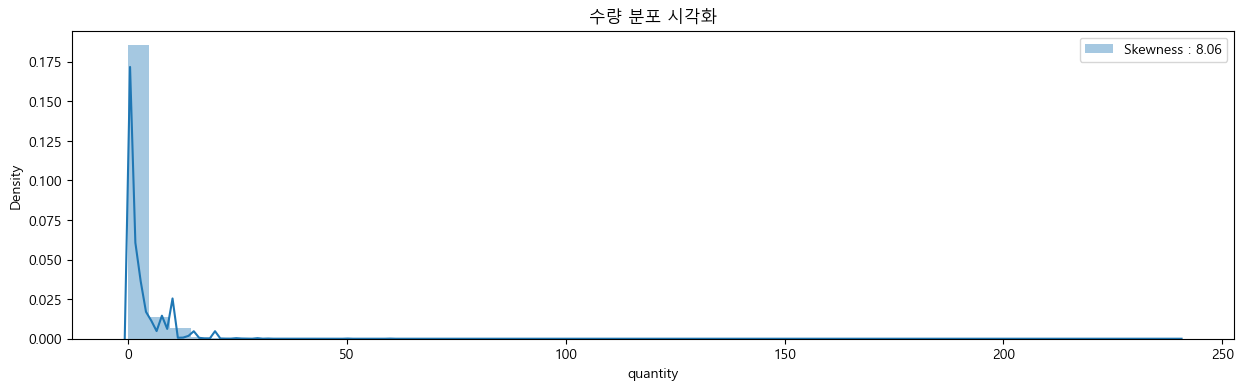

In [84]:
## 수량 분포 시각화
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(figsize=(15, 4))

# displot : 히스토그램 + 커널 밀도 추정
sns.distplot(df['quantity'], label='Skewness : {:.2f}'.format(df['quantity'].skew()))

# 지수 표기법 비활성화
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))
ax.ticklabel_format(style='plain', axis='x')

plt.title('수량 분포 시각화')
plt.legend()
plt.show()

# 해석
# 비대칭적 구조 (high skewness)

## retail_8 : 소매업태(8분류)
- 결측치 : 97,651개 (약 18.137865%)
- type_channel_new 참고해서 결측치 대체 (1~7분류에 들어가지 않는 모두 기타로 분류) → 생각 중

In [85]:
df['retail_8'].unique()

array(['3슈퍼마켓', '1대형마트', '7백화점', '2전통시장', '6무점포', '8기타', '5전문점', '4편의점',
       nan], dtype=object)

In [86]:
df['type_channel_new'].unique()

array(['슈퍼마켓', '대형마트', '백화점', '전통시장', '무점포', '기타', '온라인몰', '전문점', '편의점',
       '농가직거래', '정육점', '홈쇼핑', '외식업체'], dtype=object)

In [87]:
# 구매 장소가 '슈퍼마켓'이어도 소매업태는 무조건 3슈퍼마켓이 아님
df[df['type_channel_new'] == '슈퍼마켓']['retail_8'].unique()

array(['3슈퍼마켓', '1대형마트', '5전문점', '4편의점', '8기타', '6무점포', '2전통시장', '7백화점',
       nan], dtype=object)

In [88]:
# 확인 → 연관성 찾지 못함,,
df[(df['type_channel_new'] == '슈퍼마켓') & (df['retail_8'] == '5전문점')].head()

,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,detail,purchase,discount,quantity,q_unit,weight_quantity,multi_quantity,w_q_kg,retail_8,retail_new,take_out,panel_type,edit,family_num_level,age1_group,income_v2,day
240332,2016,2,슈퍼마켓,2016-02-14,일요일,이케아코리아광명점,경기,망고,과일류,열대과일,망고,4000,9,2,봉,70,.,0,5전문점,전문점,0,0.00,0,4,30대,200만원대,14
241802,2016,2,슈퍼마켓,2016-02-09,화요일,이케아코리아광명점,경기,망고,과일류,열대과일,망고,3000,.,2,개,50,.,0,5전문점,전문점,0,15.00,0,3,50대,600만원대,9
281086,2017,1,슈퍼마켓,2017-01-21,토요일,다올농산,경기,청과류,과일류,기타과일,기타과일,7500,.,1,개,.,.,.,5전문점,전문점,0,15.00,0,4,60대,400만원대,21
281090,2017,1,슈퍼마켓,2017-01-14,토요일,다올농산,경기,청과류,과일류,기타과일,기타과일,5000,.,1,봉,.,.,.,5전문점,전문점,0,15.00,0,4,60대,400만원대,14
282244,2017,2,슈퍼마켓,2017-02-19,일요일,주식회사준형농수산,경기,청포도_수입산_,과일류,포도,청포도,7070,.,1,팩,.,.,.,5전문점,전문점,0,0.00,0,4,40대,300만원대,19


## product : 상품명
- 결측치 : 1개 → 처리o

In [89]:
print('unique한 product 개수 : ', df['product'].nunique())
df['product'].unique()

unique한 product 개수 :  44024


array(['배친환경_', '바나나필리핀', '귤', ..., '조생귤_M_국산', '조생귤_L_국산', '스위트마운틴_수입'],
      dtype=object)

In [90]:
df['product'].value_counts()

product
바나나           41891
사과            36443
귤             19383
단감            14464
복숭아           11305
              ...  
스텔라벨라청포도팩         1
진영단감_극조생감귤        1
가을햇사과             1
GAP감홍사과           1
스위트마운틴_수입         1
Name: count, Length: 44024, dtype: int64

### 결측치 확인 및 처리

In [91]:
df[df['product'].isna()]

,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,detail,purchase,discount,quantity,q_unit,weight_quantity,multi_quantity,w_q_kg,retail_8,retail_new,take_out,panel_type,edit,family_num_level,age1_group,income_v2,day
490918,2022,12,온라인몰,2022-12-07,수요일,영농조합법인송원에이피씨,없음,NaN,과일류,사과,후지,42900,.,1,NaN,.,2,NaN,NaN,NaN,NaN,21.00,.,3,60대,700만원 이상,7


In [92]:
# 결측치와 동일한 middle, detail, purchase를 가진 상품 확인
df[(df['middle'] == '사과') & (df['detail'] == '후지') & (df['purchase'] == 42900.0)]

,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,detail,purchase,discount,quantity,q_unit,weight_quantity,multi_quantity,w_q_kg,retail_8,retail_new,take_out,panel_type,edit,family_num_level,age1_group,income_v2,day
415122,2021,1,홈쇼핑,2021-01-23,토요일,공영홈쇼핑-해빛의성세척사과,없음,부사,과일류,사과,후지,42900,.,3,박스,9,1,9,5전문점,전문점,0,0.00,0,4,50대,700만원 이상,23
490918,2022,12,온라인몰,2022-12-07,수요일,영농조합법인송원에이피씨,없음,NaN,과일류,사과,후지,42900,.,1,NaN,.,2,NaN,NaN,NaN,NaN,21.00,.,3,60대,700만원 이상,7


In [93]:
# '부사'로 결측치 대체
df.loc[df['product'].isna(), 'product'] = '부사'

# 확인
print('product 결측치 개수 : ', df['product'].isna().sum())

product 결측치 개수 :  0


### 상품명 정리

In [94]:
df['product'].nunique()

44024